<a href="https://colab.research.google.com/github/ShallyBansal963/pneumonia-detection/blob/main/chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight


from google.colab import drive


drive.mount('/content/drive')
DATASET_PATH = '/content/drive/My Drive/chest_xray'
if os.path.exists(DATASET_PATH):
    dir_list = os.listdir(DATASET_PATH)
    print("Contents of the dataset directory:")
    print(dir_list)
else:
    print(f"The directory {DATASET_PATH} does not exist.")

base_dir =  DATASET_PATH
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

class_labels = {'NORMAL': 0, 'PNEUMONIA': 1}

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
learning_rate = 1e-4


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

class_weights = {0: 1.9465478841870825, 1: 0.6728252501924558}

# CNN model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    class_weight=class_weights
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
model.summary()


Mounted at /content/drive
Contents of the dataset directory:
['test', 'train', 'val', 'chest_xray']
Found 5244 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,279,617 (84.99 MB)

 Trainable params: 22,278,657 (84.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.7943 - loss: 0.5020 - val_accuracy: 0.5000 - val_loss: 2.5740
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.8601 - loss: 0.3192 - val_accuracy: 0.5000 - val_loss: 4.4445
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.8788 - loss: 0.2613 - val_accuracy: 0.5000 - val_loss: 3.8325
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.8776 - loss: 0.2695 - val_accuracy: 0.6250 - val_loss: 2.8499
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.8911 - loss: 0.2454 - val_accuracy: 0.5625 - val_loss: 1.0500
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.8908 - loss: 0.2525 - val_accuracy: 0.6875 - val_loss: 1.2929
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.8973 - loss: 0.2303 - val_accuracy: 0.6250 - val_loss: 0.8496
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.8976 - loss: 0.2151 - val_accuracy: 0.687

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 804ms/step - accuracy: 0.8816 - loss: 0.2821
Test Loss: 0.3270988464355469, Test Accuracy: 0.855555534362793


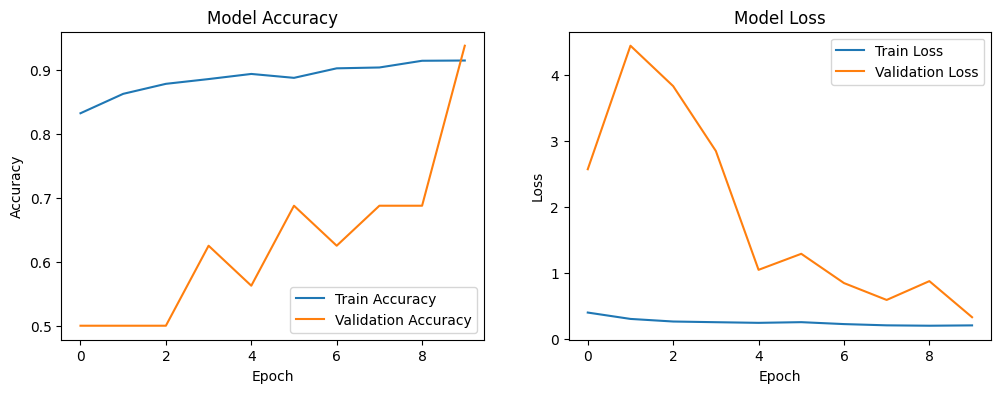

In [ ]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_gen.reset()
predictions = model.predict(val_gen)
predicted_classes = (predictions > 0.5).astype(int)

true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

confusion = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", confusion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
              precision    recall  f1-score   support

      NORMAL       0.89      1.00      0.94         8
   PNEUMONIA       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

Confusion Matrix:
 [[8 0]
 [1 7]]
